# Crankshaft List - <ins>Vehicle Price Study<ins>

## Preface:

The Crankshaft List is a secondary car listing website that provides free of charge listing services to the masses. We can only assume the onus is primarily on the customer with regards to assessing their own car's value and thus, their resulting listing price they've decided upon. Based on our dataset, we have a myriad of attributes that tie in to the nature of a vehicle and what makes them a higher value proposition over another. 

**Problem Statement:** 
<br>By studying what affects a car's price, we can more readily advice The Crankshaft List as to how to better equip its future prospective customers with the information they need in getting the best possible return, in the fastest time possible, all in all while standing out as the go-to solution in the secondary car listing space.

**Objective:** 
<br>Investigating what factors play the biggest role in affecting vehicle prices in the American market. 
<br> 
<br>
**Initial Hypothesis:** 
1. A vehicle's age will have a big role in affecting perceived value, as cars and other vehicles alike are considered depreciating assets from the very start.
2. A vehicle's average mileage-per-year will affect a car's perceived value, keeping everything else constant.
3. Brand will have a relatively big role to play as well; brands that are perceived in a customer's salience as being higher performance, higher rarity and better engineered will command a higher price. Examples; BMW and *German Precision Engineering*. 

In [45]:
# Libaries:

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [46]:
# Reading our CSV Data:

try: 
    df = pd.read_csv('vehicles_us.csv')
except: 
    df = pd.read_csv('/datasets/vehicles_us.csv')

# 1. <ins>Initial Data Exploration<ins>

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [47]:
# General/summary information about our DataFrame

display(df.head(10))
df.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


#### Initial Problems with our Data
1. 'type' values have varying letter-casing.
    <br>
2. 'is_4wd' is innately of bool type, and has two obvious distinct values (1=Yes, NaN=No). NaN values need to be replaced with '0' for computation.
    <br>
3. 'date_posted' was formatted as type=Obj and needs to be converted to type=DateTime
    <br>
4. Missing values are present in: 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd'. - Some of these columns are paramount to our project objective, while others are secondary, which we might just remove. The former might need be filled in with an estimate of grouped unique data.
    <br>
5. 'model' is a little confusing, and we might need to observe prices by their brands alone.


#### Conclusions and Further steps on Problematic Data
1. Fixing Columns: <br>
    - 'type' column will be standardized by lower-casing formatting. 
    - 'date_posted' will be converted from an object type -> DateTime type.
    - 'model' column will be further classified and grouped by their brands in a new column 
<br>
<br>
2. Conditional Hypotheses on Missing Values: <br>
    - 'model_year' values are an extremely important criteria; they represent how old a vehicle is with respect to when it left the factory. We cannot simply fill its missing values with an aggregated estimate based on grouped models, as each model year is not related to the one before or after. 
    <br><u>*We will drop these entries if there are no dependencies on other column values.*</u>
    - 'cylinders' missing values would more than likely correspond with the vehicle model it is tied to, and seeing as we do not have any missing values in 'vehicle_model', 
    <br><u>*we can safely fill them with aggregates of grouped vehicle models.*</u> 
    - 'odometer' values are also of similar importance to 'model_year' in that they provide a lot of information about a vehicle's age and hence, their longevity. We could assume that each vehicle of a similar 'model_year' would more or less have similar mileage (give or take). 
    <br><u>*We will fill in these missing values with the average mileage of grouped 'model_year'.*</u> 
    - 'paint_color' values might have a role to play in vehicle prices; you might have an exclusive color scheme that might command a premium, but this is generally only true for higher end vehicles. 
    <br><u>*We will fill these missing values with 'unknown'.*</u> 
    -'is_4wd' missing values can be assumed to be symmertical to the rest of our non-null values, being that 0='No', 1='Yes'. 
    <br><u>*We will fill NaN values with '0' and change them to the bool type.*</u>

# 2. <ins>Data Cleaning<ins>

## 2.1 Duplicates Treatment

In [48]:
# checking if there are any obvious duplicates present in our dataset

df.duplicated().sum()

0

**Intermediate Conclusion**
<br> No obvious duplicates; we can proceed with missing value treatment.

## 2.2 Missing Value Treatment

In [49]:
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

### 2.2.1 - Model Year Column

In [50]:
# Getting a table of missing 'model_year' values:

missing_modelYear = df[df['model_year'].isna()]

In [51]:
# Checking for dependency on specific brands or models:

missing_modelYear['model'].value_counts().head(20)

ford f-150                    191
chevrolet silverado 1500      155
ram 1500                      117
chevrolet silverado            98
honda accord                   80
ram 2500                       80
jeep wrangler                  70
jeep grand cherokee            68
ford escape                    68
honda civic                    60
toyota tacoma                  58
chevrolet silverado 2500hd     54
toyota camry                   54
chevrolet tahoe                54
gmc sierra 1500                54
honda cr-v                     53
ford explorer                  53
toyota corolla                 51
nissan altima                  51
dodge grand caravan            47
Name: model, dtype: int64

**Intermediate Hypothesis:"** Missing values belong to cars that are so old, they not have a record for its model year.

In [52]:
# Checking for dependency on mileage:

display(missing_modelYear['odometer'].sort_values(ascending=True).max())    # max mileage value for missing values
df['odometer'].sort_values(ascending=True).max()                            # max mileage value for original dataset

415371.0

990000.0

In [53]:
# Checking distribution of missing values compared to our original dataset:

display(len(missing_modelYear))
df['model_year'].isna().mean()

3619

0.07023774866569626

**Intermediate Conclusion:**
<br> Our missing values in the 'model_year' column do not possess any interdependence on a specific car brands/models as they are varied and random. They also do not possess any dependency on 'odometer' values as the largest mileage value of our dataset (990000) is far greater than the one we got from our missing values table. 
<br><br>*Thus, we can argue that this could have been user-error. 
Our hypothesis that our missing values might've been due to missing records for very old car makes is disproved.* 
<br><br>
Seeing as the missing value share is a substantial 7%, we shall replace these 'model_year' entries with the means of each respective 'model'. 


In [54]:
# Replacing missing values in 'model_year' with the means of each respective 'model' group:

df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.mean()))

In [55]:
# Converting values to Integers as year values are whole values:

df['model_year'] = df['model_year'].astype(int)

In [56]:
# Final check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 4.9+ MB


### 2.2.2 - Cylinders Column

In [57]:
# Filling in the missing values with the mean of each grouped car model:

df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mode()[0])).astype(int)

In [58]:
#Final check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 4.7+ MB


**Intermediate Conclusion:**
<br> We can objectively say that number of engine cylinders are directly attributed to specific models of a brand without much variation. For example, most consumer-grade cars would have an average of 4 cylinders, with the odd occurence of a high performance 6-cylinder variant, while luxury sport car brands would most likely start at 6 cylinders. In other words, the likelihood is low for a car model to have both 4 and 6 cylinders in its lineup, though it needs to be stressed this does happen. Each car model with missing values now has their respective original engine specification.

### 2.2.3 - Odometer Column

In [59]:
# Filling in missing values with the average 'odometer' values of grouped 'model_year'

df['odometer'] = df.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 4.7+ MB


In [61]:
# Checking for our outstanding missing value in the 'odometer' column:

df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [62]:
# Checking if there are other 1929 models that we can use as an aggregate fill for our missing odometer entry:

df.query('model_year == 1929')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8,gas,NaN,manual,other,silver,NaN,2018-11-18,59


As we have no relevant causational data to fill up missing values of a car from the year 1929, we will just drop it as it only represents one entry.

In [63]:
# Dropping our 1929 year model entry:

df = df.dropna(subset=['odometer']).reset_index(drop=True)

In [64]:
# Checking one last time for unique values in our odometer column:

df['odometer'].sort_values()

19607         0.0
4189          0.0
42924         0.0
22080         0.0
33893         0.0
           ...   
2840     866000.0
14245    920000.0
48961    980000.0
17869    990000.0
40729    990000.0
Name: odometer, Length: 51524, dtype: float64

In [65]:
# Investigating 'odometer' = 0 entries:

df.query('odometer == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009,gmc yukon,excellent,8,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999,ford f-150,good,6,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16
1375,5888,2006,toyota 4runner,good,6,gas,0.0,automatic,SUV,black,NaN,2019-02-22,36
1461,1000,1992,gmc sierra 1500,good,8,gas,0.0,automatic,truck,NaN,NaN,2018-09-28,47
1970,10988,2000,ford f-250 sd,good,8,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49169,3300,2002,hyundai santa fe,good,6,gas,0.0,automatic,wagon,white,1.0,2019-04-14,31
49283,3300,2002,hyundai santa fe,good,6,gas,0.0,automatic,wagon,white,1.0,2019-02-15,7
50411,25500,2007,jeep wrangler,good,6,gas,0.0,automatic,SUV,yellow,1.0,2018-06-12,48
50630,3600,2012,chrysler 200,good,4,gas,0.0,automatic,sedan,red,NaN,2018-07-24,90


In [66]:
# We have found several 0 values in the odometer column.
## Affirming if these entries are indeed new cars by looking at unique 'condition' values:

odometer_zero = df.query('odometer == 0')
odometer_zero['condition'].value_counts()

good         104
excellent     69
fair           6
like new       4
salvage        2
Name: condition, dtype: int64

We have stumbled upon 172 entries whereby there were absolutely no odometer readings. We could assume, however improbable, that these cars had never been used whatsoever in their lifetime. However, its 'condition' values range from excellent to salvage. These must be considered as missing values.

In [67]:
# Replacing odometer missing values with median odometer readings of their respective model year:

df['odometer'] = df.groupby(['model_year'])['odometer'].transform(lambda x: x.where(x!=0, x[x!=0].median()))

In [68]:
# Checking if this was fixed:

df['odometer'].sort_values()

21094         1.0
48052         1.0
23804         1.0
23811         1.0
37325         1.0
           ...   
2840     866000.0
14245    920000.0
48961    980000.0
40729    990000.0
17869    990000.0
Name: odometer, Length: 51524, dtype: float64

**Intermediate Conlusion:**
<br> Our missing 'odometer' values might have been caused by a myriad of factors. One being the odometer might've been tampered with, or even have broken throughout the years. However, it isn't fair to say it was human-error, as missing values share was close to 8000 data points. Nevertheless, it is a fair assumption that a car's mileage is directly correlated with it's model year, taking into consideration the average working adult with a 9-5 job. These missing values were filled up using median aggregate values from each present 'model_year'. This was done because the model year gives us a good estimate on how much mileage a car would have gone through on a year-on-year basis. 

### 2.2.4 - Paint Color Column

In [69]:
# Filling in missing values with 'unknown'

df['paint_color'] = df['paint_color'].fillna('unknown')
df['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6243
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

Missing values in the 'paint_color' column can only be explained by human-error. They were replaced with 'unknown', due to the fact that color is an individual's preference and not something that is inherent to a particular car brand/model. Moreover, there aren't any distinctively special colors variants (ie: emerald green, ruby red, carbon grey) on display in our dataset, apart from the 'custom' color, that would surely influence a car's value.

### 2.2.5 - 4WD Column

In [70]:
# Checking unique values of 'is_4wd' column:

df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [71]:
# Filling in missing values with (0)

df['is_4wd'] = df['is_4wd'].fillna(0).astype(int)
df['is_4wd'].value_counts()

0    25952
1    25572
Name: is_4wd, dtype: int64

In [72]:
# As our column is a boolean in nature, we will convert to the bool type:

df['is_4wd'] = df['is_4wd'].astype(bool)

**Intermediate Conclusion:**
<br>
Our 'is_4wd' column was found to be boolean in nature, and as such could only have one possible value for our missing values; 0 = No, 1 = Yes. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perfect !✅
</div>

## 2.3 Fixing Data Types

### 2.3.1 - Odometer Column

In [73]:
# Converting our odometer values to integers:

df['odometer'] = df['odometer'].astype(int)

### 2.3.2 - Type Column

In [74]:
# Amending all values to lower-casing:

df['type'] = df['type'].str.lower()

### 2.3.3 - Date Posted Column

In [75]:
# Converting to DateTime object:

df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

# 3. <ins>Features Engineering<ins>

## 3.1 New column(s) - 'day_posted' | 'month_posted | 'year_posted':

In [76]:
# Adding columns for datetime values with regards to when the ad was placed:

df.insert(loc=12, column='day_posted', value=(df.date_posted.dt.dayofweek)+1)
df.insert(loc=13, column='month_posted', value=df.date_posted.dt.month)
df.insert(loc=14, column='year_posted', value=df.date_posted.dt.year)

## 3.2 New column - 'age':

In [77]:
# Adding a column of vehicles' age when the ad was placed:

df.insert(loc=7, column='age', value = df.year_posted - df.model_year)   

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51524 entries, 0 to 51523
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int32         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int32         
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  int32         
 7   age           51524 non-null  int64         
 8   transmission  51524 non-null  object        
 9   type          51524 non-null  object        
 10  paint_color   51524 non-null  object        
 11  is_4wd        51524 non-null  bool          
 12  date_posted   51524 non-null  datetime64[ns]
 13  day_posted    51524 non-null  int64         
 14  month_posted  51524 non-null  int64         
 15  year_posted   51524 non-null  int64 

## 3.3 New Column - 'mileage':

In [79]:
# Adding a column of vehicles' mileage per year:

df.insert(loc=8, column='mileage', value=(df.odometer / df.age))

In [80]:
# Checking for any suspicious values:

df['mileage'].value_counts()

inf             2128
1.995320e+04     427
1.833333e+04     424
1.752386e+04     403
1.395120e+04     400
                ... 
1.914012e+04       1
3.816053e+03       1
2.035000e+04       1
2.191700e+04       1
2.791460e+04       1
Name: mileage, Length: 22699, dtype: int64

In [81]:
# Investigating entries with infinity values:

df.query('mileage == inf')

,price,model_year,model,condition,cylinders,fuel,odometer,age,mileage,transmission,type,paint_color,is_4wd,date_posted,day_posted,month_posted,year_posted,days_listed
19,13990,2018,hyundai elantra,excellent,4,gas,31932,0,inf,automatic,sedan,red,False,2018-08-25,6,8,2018,27
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493,0,inf,other,pickup,unknown,True,2018-10-13,6,10,2018,36
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899,0,inf,other,pickup,silver,True,2019-02-28,4,2,2019,30
99,39950,2018,chevrolet silverado,excellent,8,gas,18500,0,inf,automatic,truck,unknown,True,2018-08-05,7,8,2018,16
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168,0,inf,other,pickup,white,False,2019-03-29,5,3,2019,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51375,27890,2018,ram 1500,excellent,8,gas,9446,0,inf,automatic,truck,unknown,True,2018-05-06,7,5,2018,39
51441,28990,2018,ford f150,excellent,8,gas,10152,0,inf,automatic,truck,white,True,2018-06-13,3,6,2018,47
51445,15999,2018,chevrolet malibu,excellent,4,gas,50502,0,inf,automatic,sedan,black,False,2018-07-28,6,7,2018,8
51446,33990,2019,ram 1500,excellent,8,gas,9000,0,inf,automatic,truck,white,True,2019-01-25,5,1,2019,36


Our infinity values can be inferred to have occurred to its corresponding entries having been listed in the same year they had been bought in. Since these entries have only been driven for a year or less, we will replace these INF values with their corresponding odometer values.

In [82]:
# Replacing these INF values with their corresponding odometer values:

df.loc[df['mileage'] == np.inf, 'mileage'] = df.loc[df['mileage'] == np.inf, 'odometer']

In [83]:
# Checking if the fix was succesfully:

df.query('mileage == inf')

,price,model_year,model,condition,cylinders,fuel,odometer,age,mileage,transmission,type,paint_color,is_4wd,date_posted,day_posted,month_posted,year_posted,days_listed


In [84]:
# Converting 'mileage' to integer type:

df['mileage'] = df['mileage'].astype(int)

## 3.4 New Column - 'brand'

In [85]:
# Classifying our car models by just their brands:

df.insert(loc=2, column='brand', value=(df.model.str.split().str[0]))

## 3.5 Classifying 'condition' column

In [86]:
# Classifying our condition values into unique identifiers for easier computations later on: 

def condition_id(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0
            
        
df['condition'] = df['condition'].apply(condition_id)

df['condition'].value_counts()

3    24773
2    20144
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [87]:
# Constructing a dictionary of condition IDs for future reference:

condition_id = {
    0: 'salvage',
    1: 'fair',
    2: 'good',
    3: 'excellent',
    4: 'like new',
    5: 'new'
}

# 4. <ins>Cleaned Data: Final Check<ins>

In [88]:
# Getting general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51524 entries, 0 to 51523
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int32         
 2   brand         51524 non-null  object        
 3   model         51524 non-null  object        
 4   condition     51524 non-null  int64         
 5   cylinders     51524 non-null  int32         
 6   fuel          51524 non-null  object        
 7   odometer      51524 non-null  int32         
 8   age           51524 non-null  int64         
 9   mileage       51524 non-null  int32         
 10  transmission  51524 non-null  object        
 11  type          51524 non-null  object        
 12  paint_color   51524 non-null  object        
 13  is_4wd        51524 non-null  bool          
 14  date_posted   51524 non-null  datetime64[ns]
 15  day_posted    51524 non-null  int64 

# 5. <ins>Studying Core Parameters<ins>

In [89]:
# Getting a brief statistical summary of our important numerical data:

df[['price', 'age', 'mileage', 'cylinders', 'condition']].describe()

,price,age,mileage,cylinders,condition
count,51524.00000,51524.000000,51524.00000,51524.000000,51524.000000
mean,12132.35104,8.594985,17622.68832,6.121458,2.637548
std,10040.86718,6.103437,12376.46656,1.657292,0.712449
min,1.00000,0.000000,0.00000,3.000000,0.000000
25%,5000.00000,4.000000,10857.00000,4.000000,2.000000
50%,9000.00000,8.000000,15068.50000,6.000000,3.000000
75%,16836.00000,12.000000,20728.25000,8.000000,3.000000
max,375000.00000,110.000000,373200.00000,12.000000,5.000000


**Intermediate Hypothesis:**
It appears there may be some extreme outliers: 
1. We can see some illogical values at both ends of the spectrum in our 'price' column (min= \\$1, max= \\$375,000)
2. It is observable that our 'age' column contains a max value of 110 years, while plausible in practice, may not be relevant to our study. 
3. Our mileage per year column also contains some less than ideal values at the upper limit. Having accumulated over 100,000km in a year is already a hard enough task, let alone beyond 300,000km.
4. The cylinders column contains plausible data, though we may not be interested in 10 and 12 cylinder configurations as they do not represent a realistic everyday purchase by the typical working adult.

## 5.1 Studying 'price'

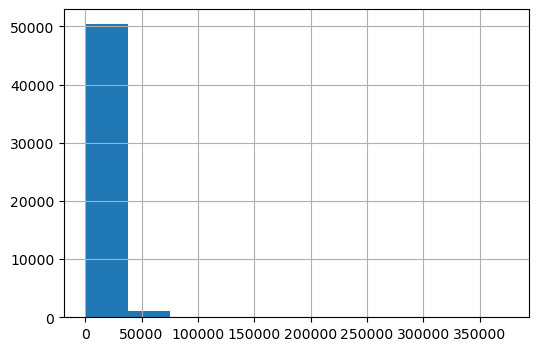

In [90]:
# 'price' histogram:

df['price'].hist(bins=10, grid=True, figsize = (6,4))
plt.show()

Prices are saturated below \\$45,000; we barely see any data above that and our figures that are anywhere close to our max value are nowhere to be found.

<AxesSubplot:>

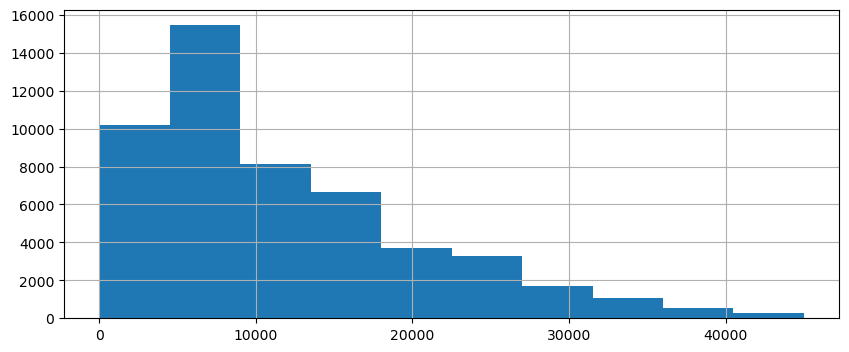

In [91]:
# Price histogram filtered < $45,000

df['price'].hist(bins=10, grid=True, figsize = (10,4), range=(0,45000))

In [92]:
# Clarifying the 'condition' of cars that represent our highest and second-highest peaks of 
## range 0 - 4500 and range 4500 - 9000):

display(df[df['price'] <= 4500]['condition'].value_counts().sort_index())
df[(df['price'] >= 4500) & df['price'] <= 9000]['condition'].value_counts().sort_index()

0      78
1    1284
2    5116
3    3727
4     600
5      20
Name: condition, dtype: int64

0      115
1     1607
2    20144
3    24773
4     4742
5      143
Name: condition, dtype: int64

**Intermediate Conclusion:**
<br>
We get a clearer picture of our frequency distributions of price. Our car listing service would predominantly be used for the used-car market, with a smaller subset being newer vehicles. Our histogram's highest peak of about \\$7000 is a great representation of this, as is our highest 'condition' frequencies belonging to the 'good' and 'excellent' (average) conditions. 

## 5.2 Studying 'age'

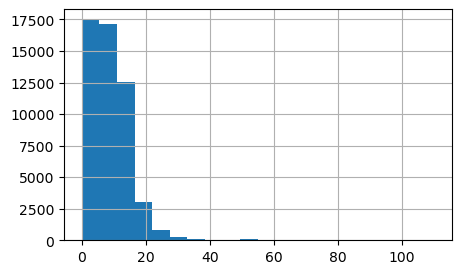

In [93]:
# 'age' histogram:

df['age'].hist(bins=20, grid=True, figsize = (5,3))
plt.show()

Here's our observation: the majority of car ages fall below approximately 17 years before dropping off significantly. Any data above the 30-40 year mark is quite unobservable. 

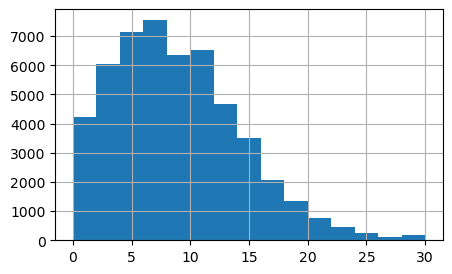

In [94]:
# Investigating ages ranged 0-30:

df['age'].hist(bins=15, grid=True, figsize = (5,3), range=(0,30))
plt.show()

In [95]:
# Investigating correlation between cars aged 1 year(s) and their condition:

df.query('age < 1')['condition'].value_counts().sort_index()

0      4
1      2
2    517
3    995
4    536
5     74
Name: condition, dtype: int64

There's nothing extraodinary about our condition data here. We see a few 'salvage' and 'fine' conditioned cars that might imply the occurence of an acident within that timeframe. Besides that, our condition data are pretty logically dispersed between used-cars, with a small subset of new ones. These are most likely individuals who just decided they didn't like what they had purchased or had a change of heart.

**Intermediate Conclusion:**
<br>
Our peak of about 5-8 years is quite representative of the typical lifespan of a car when it is sold; this is for a couple of reasons:
1. By American standards, the book keeping depreciation duration of a car is 5 years, after which it does not count towards a company's expenses for tax purposes. It makes sense for a company's fleet of cars to be sold and replaced at and around this time.
2. For the typical working consumer, 5-8 years is a typical duration of when a promotion is acquired, or when an individual decides to have a family; upgrading to a bigger car makes sense. Anything beyond 12 years and we start to see a gradual decline in ads posted. We can assume that the older the vehicle, the less value there is in selling a depreciating asset with an inherently low (current) intrinsic value.
3. Our {0} age values could perhaps be attributed to car rental companies and/or organization car fleets that have been replaced before some of their units have been able to be delivered (assuming the fleet of cars were delivered from the factory in a staggered time frame. 

## 5.3 Studying 'mileage' per year

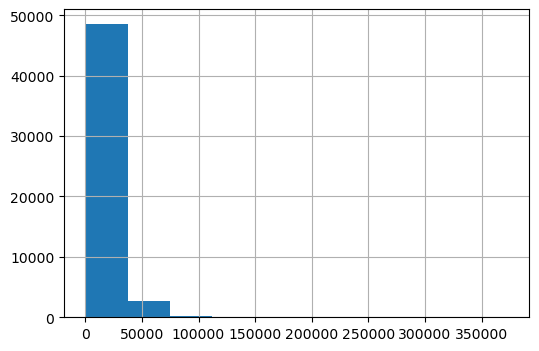

In [96]:
# 'mileage' histogram:

df['mileage'].hist(bins=10, grid=True,  figsize = (6,4))
plt.show()

We can observe the majority of entries pooling at and around the 0-75,000 range. We have an extensively dispersed subset of values above that, which are outliers in their own rights. Two possible reasons for this: These individuals travel significantly long distances as part of their job or these entries were purely errors from the data colelction stage. Either ways, these values still do not make sense (especially values at the 300,000 mark). 

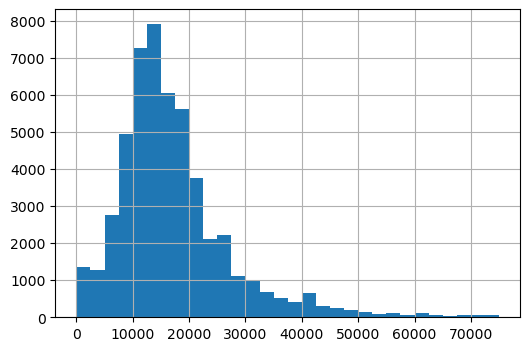

In [97]:
# Investigating entries of range below 75,000 km: 

df['mileage'].hist(bins=30, grid=True,  figsize = (6,4), range=(0,75000))
plt.show()

**Intermediate Conclusion:**
<br>
In the automotive world, there is an old adage when buying a used car: if a car has done an approximate average of 15,000km per year, it is within reason for the typical working adult living in the city/suburbs. Anything beyond that is considered abnormal to a degree (car rentals, outstation sales trips, occupations in the agricultural industry, equipment transportation). Our peak of 15,000km and below is an accurate depiction of this phenomenon.  

## 5.4 Studying 'cylinders'

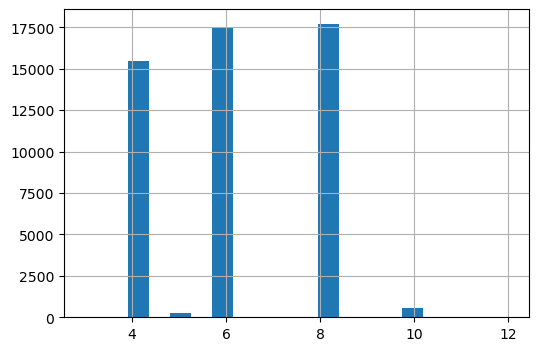

In [98]:
# 'cylinders' histogram:

df['cylinders'].hist(bins=20, grid=True,  figsize = (6,4))
plt.show()

In [99]:
# Ensuring our 10 and 12 cylinder configurations are logically attributed to car models that make sense:


df.query('cylinders >= 10')['model'].value_counts()

ford econoline              75
ram 3500                    46
dodge charger               43
ford f-250 sd               40
chevrolet camaro            34
ford f-350 sd               22
ford f250 super duty        21
jeep wrangler               21
ford f350                   18
ford mustang                18
ford f-150                  18
ram 1500                    17
gmc sierra 1500             16
ford f-250                  13
toyota tundra               13
ram 2500                    13
ford f-250 super duty       12
jeep grand cherokee         10
ford expedition             10
ford f350 super duty        10
honda odyssey                9
ford f250                    9
nissan rogue                 8
nissan altima                8
gmc acadia                   6
honda accord                 5
toyota rav4                  5
honda civic                  5
toyota corolla               4
chevrolet silverado 1500     3
ford f150                    3
chevrolet corvette           3
toyota c

It appears our filtered entries of 10 cylinders and above have some illogical entries. While it makes sense for a Chevrolet Camaro, Dodge Charger and Ram 3500 to have a V10 variant, a quick Google Search will tell you the biggest engine configuration ever fitted into a Ford Econoline is a V8. Furthermore, we have entries of cars models and their respective engine configuration that make even less sense. For example, you would not be able to fit a 10-cylinder engine into a Ford Focus hatchback even if you tried, nor would you ever find a Toyota Camry with anywhere more than 6.

**Intermediate Conclusion:**
A typical engine configuration is usually even numbered for balance and hence lower vibrations transferred to the vehicle. Our histogram on amount of cylinders reflect this, with the odd occurence of 3 and 5 cylinder configs. We generally find cars for the average consumer in Europe and Asia to be in the 4-cylinder config, as this reduces petrol consumption. Assuming our data is from the United States however, it isn't unusual to see a higher market share of 6-cylinder engines and above. This is inherent to the the US for various reasons, though the key factor here is low gas prices. Our entries of 3 and 5 cylinder configurations, while rare, do actually make sense as these could be very compact vehicles or petrol/electric hybrids (Toyota Yaris hybrid, Volvo X40, Nissan X-Trail). The main question however, is how our 10 and 12-cylinder engine configurations attributed to smaller cars got into our dataset to begin with. We will have to treat them as outliers.

## 5.5 Studying 'condition'

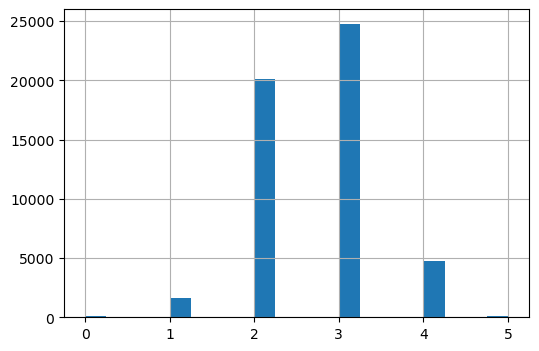

In [100]:
# 'condition' histogram:

df['condition'].hist(bins=20, grid=True,  figsize = (6,4))
plt.show()

**Intermediate Conclusion:**
<br>
Our condition data seems accurate and within reason. Our highest frequencies belong to the groups of 'excellent' and 'good', which represent used cars that are NEITHER close to new or have suffered an accident. However, we might not want to take into account the 'salvage' and 'new' condition as that does not represent a typical purchase decision by the average consumer. We can also obviously infer how this particular condition will affect a car's price.



# 6. <ins>Studying and treating outliers<ins>


## 6.1 Outliers: 'cylinders'

In [101]:
# Checking our share of entries with 'cylinders' >= 10 and;
## entries with 'cylinders' == 3 and 5:

((df['cylinders'] >= 10).mean()) + (len(df.query("cylinders == 3 or cylinders == 5")) / len(df))

0.016633025386227778

We can drop these entries as they only represent a 1.6% share of our data, while also being inplausible to the average purchasing decision of the typical working adult; no one apart from a car enthusiast would be looking at purchasing a petrol-guzzling 10-cylinder vehicle. On the flipside, our 3 and 5 cylinder odd-numbered engine configurations are attypical of the average consumer-grade vehicle.

In [102]:
# Filtering out 10 and 12 Cylinder entries:
## Filtering out 3 and 5 Cylinder entries:

df_good = df.query("cylinders != 3 and cylinders !=5 and cylinders != 10 and cylinders !=12")
 
df_good.reset_index(inplace=True, drop=True) 

## 6.2 Outliers: 'price'

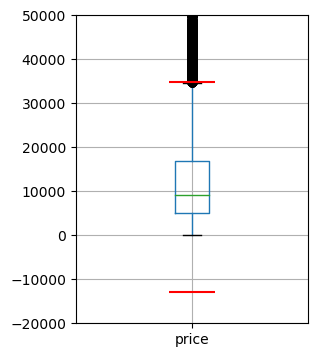

In [103]:
# Determining the statistical outer limits for our 'price' distribution:

Q1 = df_good['price'].quantile(0.25)
Q3 = df_good['price'].quantile(0.75)
IQR = Q3 - Q1

df_good.boxplot(column=['price'], grid=True, figsize=(3,4))
plt.ylim(-20000, 50000)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.show()

We know for a fact there are a group of entries situated at around the \\$0 mark. This needs to be investigated.

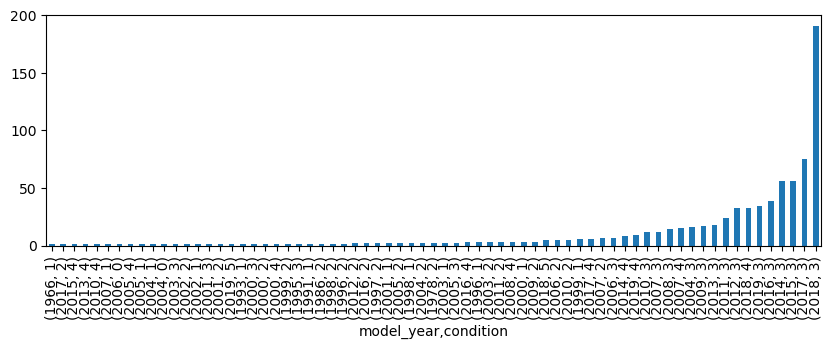

0.0013618331458345669

In [104]:
# Investigating our 'price' outliers below a rough figure of $500 in relation to their condition:

df_filtered = df_good.query('price < 500').groupby('model_year')['condition'].value_counts().sort_values()
df_filtered.plot(kind='bar', figsize=(10,3))
plt.show()

len(df_filtered) / len(df_good)   # Getting our share of illogical outliers

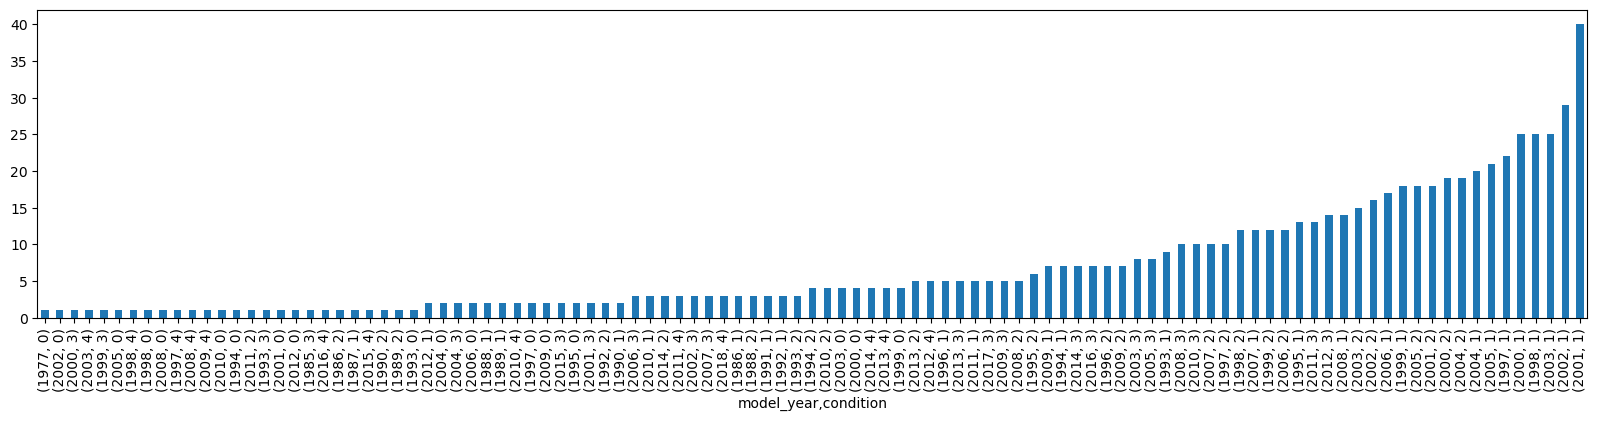

0.0025657725936013578

In [105]:
# Clarifying if our theoretical benchmark is accurate and values are plausible by looking into our $500 - $1500 bracket:

df_filtered = df_good.query('price < 1500 and price > 500').groupby('model_year')['condition'].value_counts().sort_values()
df_filtered.plot(kind='bar', figsize=(20,4))
plt.show()

len(df_good.query('price <= 1500 and model_year > 2006 and condition >= 4')) / len(df_good) # Getting share of illogical outliers

**Intermediate Conclusion:**

We used a rough estimate of \\$500 as a benchmark for what is considered a believable price for a used car. In our first bar chart of cars under \\$500, the majority of cars were of model years 2015-2018 and of 'excellent' condition. This can't be true in any scenario. When we got to our 2nd bar chart of prices between \\$500 and \\$1500, we start to see a peak containing very plausible data. Majority of our distribution is at or below the model year 2006 and of at least "good" or "fair" condition. We can drop our entries below the \\$500 mark as they represent only 0.14% share of our dataset. Subsequently, we will also drop values that fall below \\$1500 and fit the condition of above model year 2006 and with a condition of 'like-new' as this only represents a 0.26% share.

In [106]:
# Getting a filtered table of valid 'price' data by:
## Filtering out price values above our statistical upper limit, values below $500 and values below $1500 that fit our condition:

price_upper = Q3+1.5*IQR
price_lower = Q1-1.5*IQR
display(price_upper)
display(price_lower)

df_good = df_good.query('price <= @price_upper and price >= 500')     
df_good = df_good.drop(df_good.query('price <= 1500 and model_year > 2006 and condition >= 4').index)

df_good.reset_index(drop=True, inplace=True)

34750.0

-12850.0

## 6.3 Outliers: 'age'

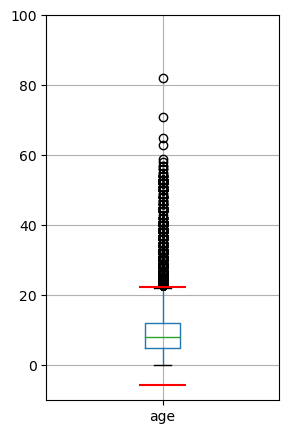

In [107]:
# Determining the statistical outer limits for our 'age' distribution:

Q1 = df_good['age'].quantile(0.25)
Q3 = df_good['age'].quantile(0.75)
IQR = Q3 - Q1

df_good.boxplot(column=['age'], grid=True, figsize=(3,5))
plt.ylim(-10, 100)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.show()

**Intermediate Conclusion:**
<br>
Our upper limit age of 22.5 is adequately long enough timeline for us to determine the factors that affect a car's price. Anything beyond that is futile considering the depreciating nature of automobiles. (This is assuming we do not have any classic collectible cars in our dataset)

In [108]:
# Filtering out age values above our statistical outer limits:

age_upper = Q3+1.5*IQR
age_lower = Q1-1.5*IQR
display(age_upper)
display(age_lower)

df_good = df_good.query('@age_lower < age <= @age_upper')     

df_good.reset_index(drop=True, inplace=True)

22.5

-5.5

## 6.4 Outliers: 'mileage'

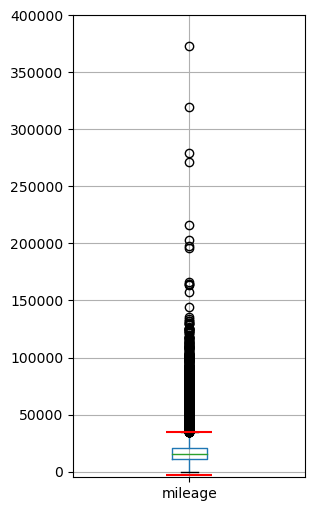

In [109]:
# Determining the statistical outer limits for our 'mileage' distribution:

Q1 = df_good['mileage'].quantile(0.25)
Q3 = df_good['mileage'].quantile(0.75)
IQR = Q3 - Q1

df_good.boxplot(column=['mileage'], grid=True, figsize=(3,6))
plt.ylim(-5000, 400000)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.show()

In [110]:
df_good['mileage'].quantile(0.5)

15169.0

**Intermediate Conclusion:**
<br>
If our median of 15,000km per year is anything to go by, the upper limit of 35,000km a year is a plausible scenario with regards to the average working adult. Anything beyond that and we begin to wonder how many interstate workers who travel by car daily there really are, of which begs the question, why don't they just relocate? If not, do these particular entries belong to car rentals? Unfortunately, we don't have that kind of data.

In [111]:
# Filtering out mileage values above our statistical outer limits:

mileage_upper = Q3+1.5*IQR
mileage_lower = Q1-1.5*IQR
display(mileage_upper)
display(mileage_lower)

df_good = df_good.query('@mileage_lower < mileage <= @mileage_upper')     

df_good.reset_index(drop=True, inplace=True)

35033.5

-3274.5

## 6.5 Outliers: 'condition'

In [112]:
# Checking our subset of cars with the 'salvage' or 'new' condition:

len(df_good.query('condition == 0 or condition == 5')) / len(df_good)

0.003973450128685601

**Intermediate Conclusion**
Our 'salvage' and 'new' cars represent an extremely unnoteworthy sample size of 0.4%. Either ways, if we take into consideration the nature of a car listing service being foremostly catered towards used-cars, it doesn't make sense for a potential customer visiting the website to be considering a new car. They are better off going to a new-car dealership in that respect. Furthermore, these customer also wouldn't consider a salvaged car, unless they were into reclamation projects. We will remove this entries.

In [113]:
# Filtering out entries with condition = 'salvage' and condition = 'new':

df_good = df_good.query('condition != 0 and condition!= 5')
df_good.reset_index(drop=True, inplace=True)

Since we are omitting 'new' cars from our filtered data, we will also filter out cars with 'mileage' == 0

In [114]:
# Making sure we have a small subset of 'mileage' == 0 entries before filtering out:

len(df.query('mileage == 0')) / len(df_good)

0.0007933269867174395

In [115]:
# Filtering out entries with 'mileage' == 0:

df_good = df_good.query('mileage != 0')

In [116]:
# General Summary of our filtered table of good data:

df_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44099 entries, 0 to 44117
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         44099 non-null  int64         
 1   model_year    44099 non-null  int32         
 2   brand         44099 non-null  object        
 3   model         44099 non-null  object        
 4   condition     44099 non-null  int64         
 5   cylinders     44099 non-null  int32         
 6   fuel          44099 non-null  object        
 7   odometer      44099 non-null  int32         
 8   age           44099 non-null  int64         
 9   mileage       44099 non-null  int32         
 10  transmission  44099 non-null  object        
 11  type          44099 non-null  object        
 12  paint_color   44099 non-null  object        
 13  is_4wd        44099 non-null  bool          
 14  date_posted   44099 non-null  datetime64[ns]
 15  day_posted    44099 non-null  int64 

## 6.6 New Column: 'price_bracket'

In [117]:
# Constructing a column of price brackets:

def group_price(price):
    
    if price <= 5000:
        return 5000
    if price <= 10000:
        return 10000
    if price <= 15000:
        return 15000
    if price <= 20000:
        return 20000
    if price <= 25000:
        return 25000
    if price <= 30000:
        return 30000
    elif price <= 35000:
        return 35000
    
df_good['price_bracket'] = df_good['price'].apply(group_price)

# 7. <ins>Studying core parameters without outliers<ins>

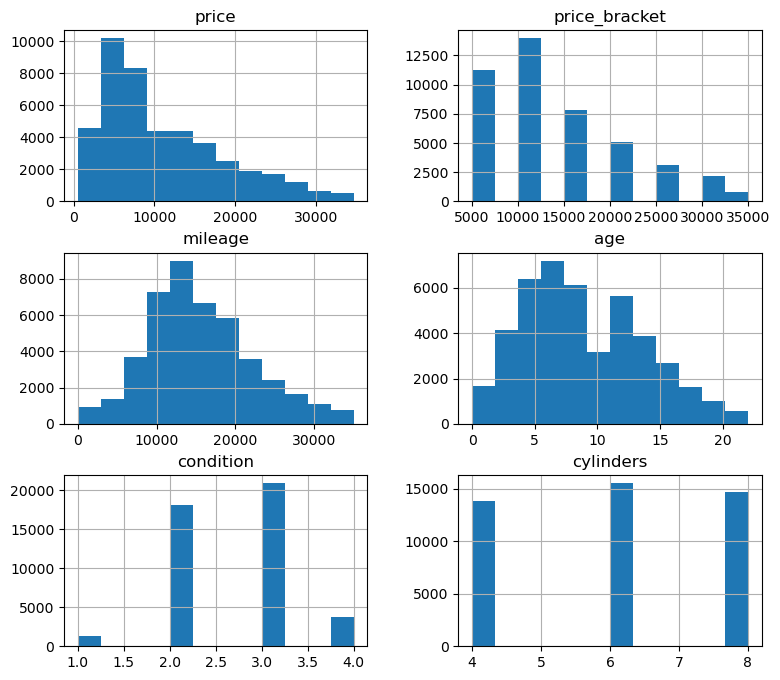

In [118]:
# Constructing new histograms for our newly filtered dataset:

df_good[['price', 'price_bracket', 'mileage', 'age', 'condition', 'cylinders']].hist(bins=12, figsize=(9,8))

plt.show()

**EDA Conclusion**
1. Price: We've gotten rid of our far-left and far-right tail of outliers, and we see a more representative set of data of a typical used-car market. The largest frequencies happen at or below the \\$10,000 bracket (affordable cars), with a sharp and subsequently gradual decline the less affordable a car gets. 
2. Mileage: We have a attained a nice looking bell-like curve with a peak of about 13,000km, compared to our unfiltered data where we saw a pinnacle instead of a peak that was skewed towards the left. We can safely say this is a more accurate depiction of a typical working population.
3. Age: We have also attained a moderately nice looking bell-like curve after eliminating extensively old cars from our data. As mentioned before, our peak of about 5-8 years before a gradual drop is an accurate depiction of modern day society, what with our financial and societal factors.
4. Condition: We have also eliminated two categories of unlikely 'condition'(s) in a used-car listing, those being 'new' and 'salvage'. We're glad to see our peaks are settled in at the 'good' (2) and 'excellent' (3) categories.
5. Cylinders: After filtering out engine configurations (3,5,10,12) that are rare and unfeasible to the typical working adult/family, we are left with 3 of the most used engine configurations around the States. This is accurate.

# 8. <ins>Ads lifetime<ins>

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

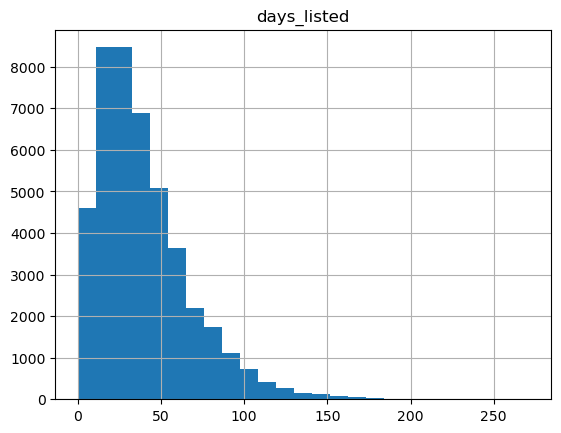

In [119]:
# Frequency distribution of ad lifetime:

df_good.hist(column='days_listed', bins=25)

It appears the most frequent lifetime of an ad falls below the 35-day mark. We have two things to note:
1. Ads that were removed quickly
2. Extensively long advertisements 

In [120]:
# Getting a typical lifetime of an ad:

display(df['days_listed'].mean())
df['days_listed'].median()

39.55438242372487

33.0

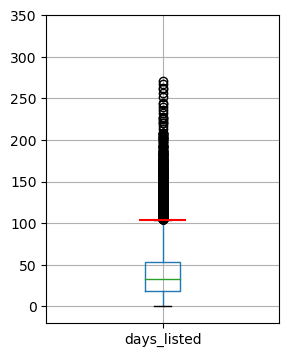

In [121]:
# Determining our outer limits for 'days_listed'

Q1 = df_good['days_listed'].quantile(0.25)
Q3 = df_good['days_listed'].quantile(0.75)
IQR = Q3 - Q1

df_good.boxplot(column=['days_listed'], grid=True, figsize=(3,4))
plt.ylim(-20, 350)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')

plt.show()

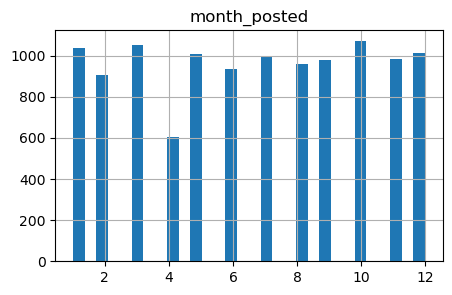

In [122]:
# Determing when our abnormally short ads were posted:

(df_good
 .query("days_listed <= @Q1")
 .hist('month_posted', bins=30, figsize=(5,3))
)

plt.show()

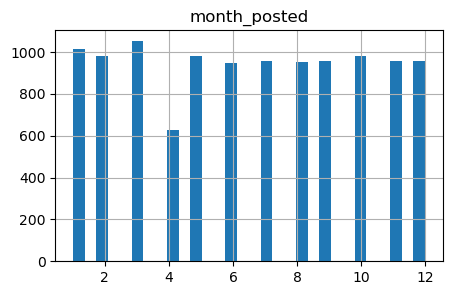

In [123]:
# Determing when our abnormally long ads were posted:

(df_good
 .query("days_listed >= @Q3")
 .hist('month_posted', bins=30, figsize=(5,3))
)

plt.show()

In [124]:
# Getting a statistical overview of 'days_posted':

df_good.days_listed.describe()

count    44099.000000
mean        39.586363
std         28.289458
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

**Intermediate Conclusion:**
1. Our average lifetime of an ad is 33 days or about a month. We used the median as our high abnormal ad-lifetime values were significantly beyond our the majority of our data. 
2. Ads that were posted for just 19 days and below represent postings that were abnormally short, as 19 days constitutes our 25% percentile. There aren't many correlations here as to why that is, but we can assume they didn't receive an offer for the perceived value they had priced their vehicle at, or it possibly indicates that an individual had a change of heart in getting a brand new car during the months whereby discounts and plate clearances are at a low. 
3. Ads that were posted for longer than our 53 days/75% percentile represent postings that are abnormally long.

# 9. <ins>Average price per each type of vehicle<ins>

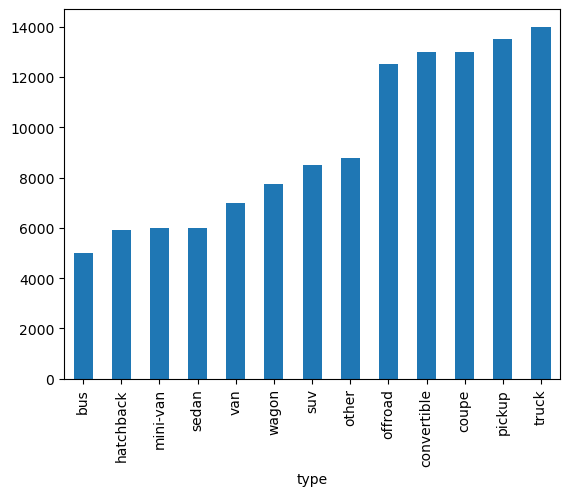

In [125]:
# Getting an overview of the average price of each unique vehicle type:

(df_good
 .groupby('type')['price'].median().sort_values()
 .plot(kind='bar')
) 
plt.show()

In [126]:
# Investigating the nature/engine configuration of our vehicle types by the highest and lowest two price brackets:

display((df_good.pivot_table(index='type', values='cylinders', aggfunc='median')
 .loc[['pickup', 'truck']]
)) 
(df_good.pivot_table(index='type', values='cylinders', aggfunc='median')
 .loc[['hatchback', 'sedan']]
) 

,cylinders
type,
pickup,8
truck,8


,cylinders
type,
hatchback,4
sedan,4


**Intermediate Conclusion**
<br>
Our highest 2 vehicle types show a trend of being high performance vehicles with a higher amount of cylinders. The lower 2 type categories have a lower amount of cylinders. There is a trend here whereby the higher the number of cylinders, the higher the price, assuming the nature of the vehicle type stays constant. For example, you wouldn't categorize a bus or mini-van to be a high performance vehicle, however they would inherently require a larger engine to facilitate a much larger amount of mass. 

<AxesSubplot:>

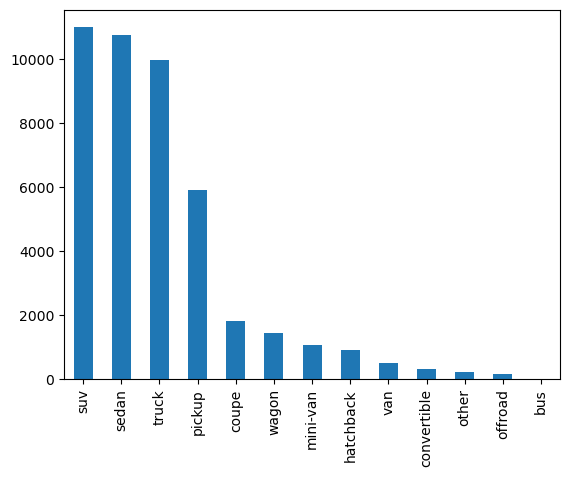

In [127]:
# Getting the types of vehicles that dominate our advertisement listing:

df_good['type'].value_counts().sort_values(ascending=False).plot(kind='bar')

**Intermediate Conclusion**
<br>
Our highest occuring ads belong to suv's and sedans. We would assume these are family-oriented vehicles.

# 10. <ins>Price factors<ins>

## 10.1 Transmission:

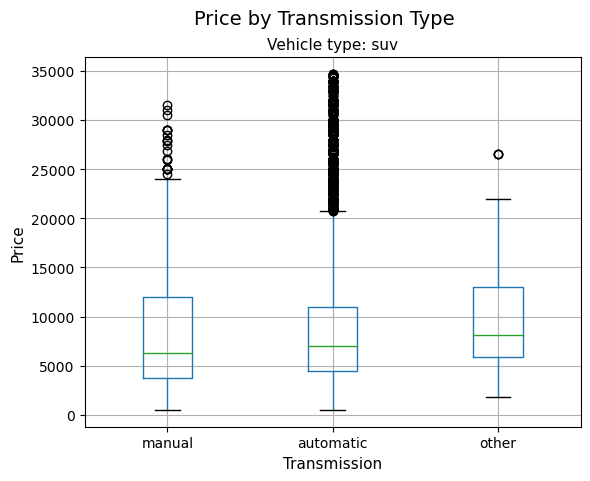

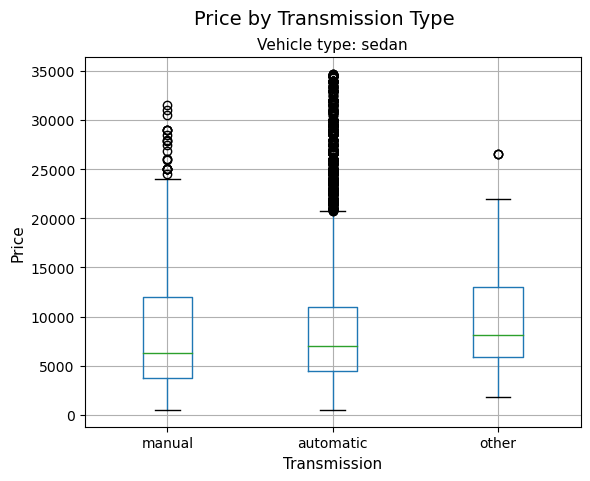

In [128]:
# Constructing price boxplots by transmission types for the suv and sedan types:

data = df_good.query("type == 'suv' or type == 'sedan'")

# Getting dataframe with sorted median values of each transmission group
def boxplot_sorted(data, by, column, rot=0):          

    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    meds = data2.median().sort_values()
    return data2[meds.index].boxplot(rot=rot, return_type="axes")

for k in data['type'].unique():

    axes = boxplot_sorted(data, by = ['transmission'], column = 'price')
    plt.xlabel('Transmission', fontsize=11)
    plt.ylabel('Price', fontsize=11)
    plt.title(f"Vehicle type: {k}", fontsize=11)
    plt.suptitle('Price by Transmission Type', fontsize=14)
    plt.show()


**Intermediate Conclusion**
<br>
There is a positive correlation between more complex transmission types and a vehicle's price. An automatic gearbox is inherently more expensive to produce than a manual one. Unfortunately, we do not have data on the nature of our 'other' category, but we can only assume they are more complex in nature and are rarer in commodity; the transmission types can be anything from electric motors, to manual sequential gearboxes that you may find in racing cars. 

## 10.2 Paint Color:

In [129]:
# Getting our colors that have a big enough distribution:

df_good['paint_color'].value_counts()

white      8180
unknown    7940
black      6424
silver     5584
grey       4388
blue       3952
red        3824
green      1245
brown      1114
custom      990
orange      191
yellow      178
purple       89
Name: paint_color, dtype: int64

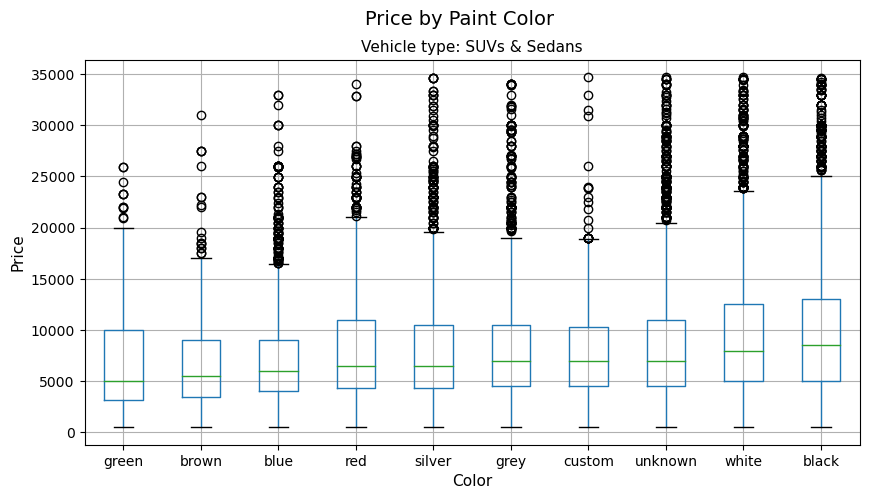

In [130]:
# Constructing price boxplots by paint color for the suv and sedan types:       

data = df_good.query("type == 'suv' or type == 'sedan'").query("paint_color != ['orange', 'purple', 'yellow']")
 
# Getting dataframe with sorted median values of each observable paint color:
def boxplot_sorted(data, figure_size, by, column,  rot=0): 
    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    meds = data2.median().sort_values()
    return data2[meds.index].boxplot(rot=rot, return_type="axes")


figure=plt.figure(figsize=(10,5))
axes = boxplot_sorted(data, figure, by = ['paint_color'], column = 'price')
plt.xlabel('Color', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.title(f"Vehicle type: SUVs & Sedans", fontsize=11)
plt.suptitle('Price by Paint Color', fontsize=14)
plt.show()


**Intermediate Conclusion**
<br>
As colors are very subjective to individual customers, so we can only make a simple observation: our two most popular vehicle types are similar, and hence should represent the general population in that they prefer muted colors over vibrant ones. We can assume this is because they are easier to maintain or the fact its hard to go wrong with them, as opposed to getting a shade/palette of a vibrant color that is unappealing. This demand for muted and evergreen colors are reflected in its higher price. As for our custom colors and unknowns, we don't have descriptive data on them to really make a conclusion, so we will just assume they belong to colors that are of higher rarity and cost, thus plotting them on the higher end of the price spectrum.

## 10.3 Age:

,age,price
age,1.000000,-0.569003
price,-0.569003,1.000000


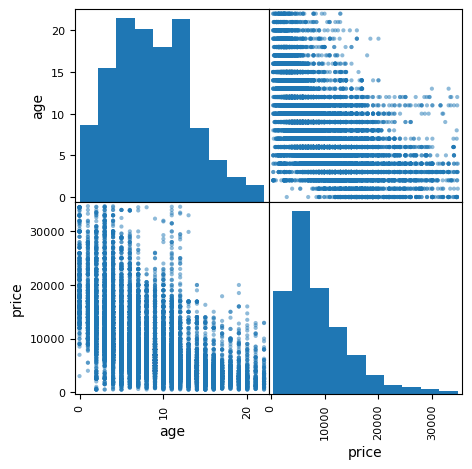

In [131]:
# Scatterplot matrix and correlation matrix for age and price:

data = df_good.query("type==['suv', 'sedan']")
data_age = data[['age', 'price']]

pd.plotting.scatter_matrix(data_age, figsize=(5,5))
data_age.corr()

**Intermediate Conclusion**
<br>
Our age/price scatterplot shows a strong negative correlation with each other. This is realistic, as the older a vehicle, the more its intrinsic value (regardless of perceived value) drops. 

## 10.4 Mileage:

,mileage,price
mileage,1.000000,0.202093
price,0.202093,1.000000


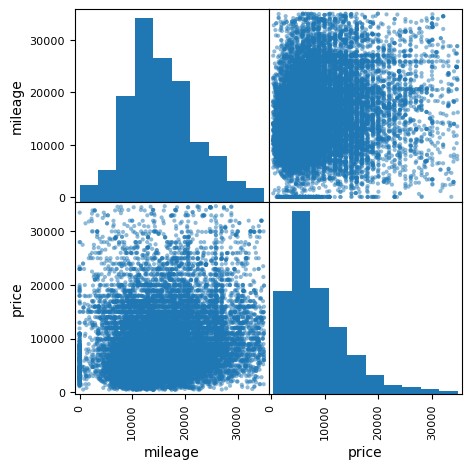

In [132]:
# Scatterplot matrix and correlation matrix based on mileage per year and price:

data = df_good.query("type==['suv', 'sedan']")
data_mileage = data[['mileage', 'price']]

pd.plotting.scatter_matrix(data_mileage, figsize=(5,5))
data_mileage.corr()

**Intermediate Conclusion:**
<br>
Our mileage per year scatterplots depict a close to null correlation on price. We'd like to see a strong correlation here that would make more real-world sense, but we have to remember we've gotten rid of our outliers of extremely high mileage values. Our below 35,000km values are still within reason, though we have to disregard mileage as a price determining factor.

## 10.5 Condition:

,condition,price
condition,1.000000,0.280564
price,0.280564,1.000000


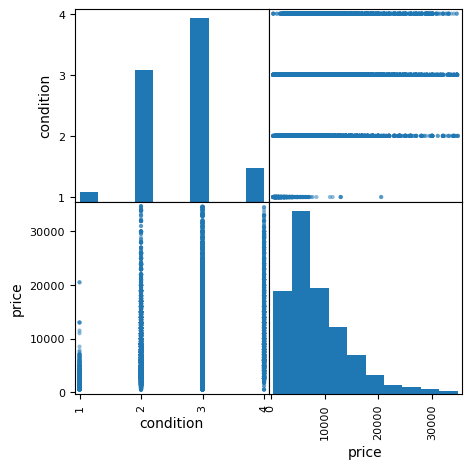

In [133]:
# Scatterplot matrix and correlation matrix based on condition and price:

data = df_good.query("type==['suv', 'sedan']")
data_condition = data[['condition', 'price']]

pd.plotting.scatter_matrix(data_condition, figsize=(5,5))
data_condition.corr()

**Intermediate Conclusion:**
<br>
As with our mileage correlation values, we see a very weak correlation with condition levels. We have to understand that the price depicted on an ad-listing website like ours are purely down to the individual. Condition is subjective, but intrinsic value based on age depreciation will always hold true before taking into account anything else.  

## 10.6 Brand:

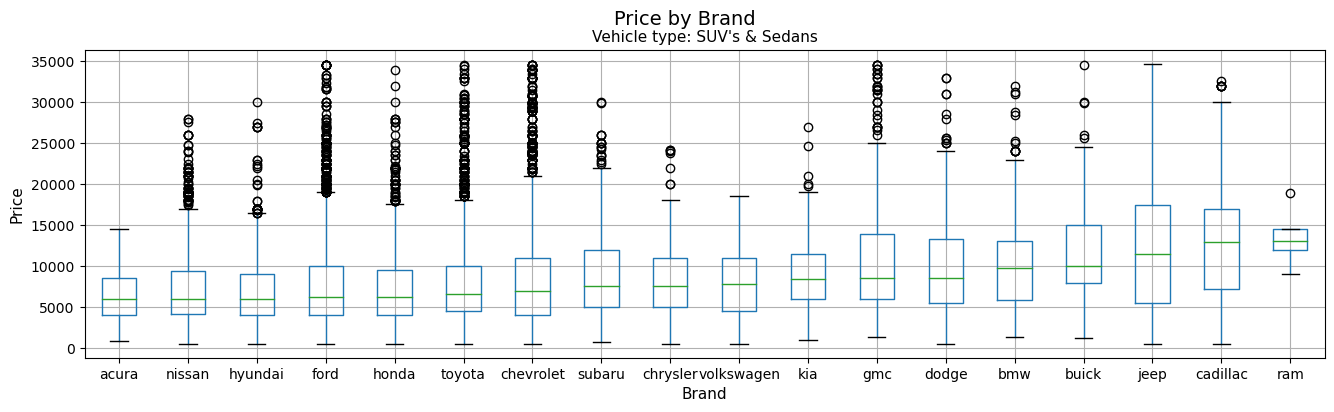

In [134]:
# Boxplot on the relationship between brand and price:

data = df_good.query("type == 'suv' or type == 'sedan'")

# Getting dataframe with sorted median values of each brand
def boxplot_sorted(data, figure, by, column, rot=0):          

    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    meds = data2.median().sort_values()
    return data2[meds.index].boxplot(rot=rot, return_type="axes")


figure=plt.figure(figsize=(16,4))
axes = boxplot_sorted(data, figure, by = ['brand'], column = 'price')
plt.xlabel('Brand', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.title(f"Vehicle type: SUV's & Sedans", fontsize=11)
plt.suptitle('Price by Brand', fontsize=14)
plt.show()


**Intermediate Conclusion:**
<br>
Our obervation depicts the lower half of the price spectrum being dominated by Asian-made cars, while the upper end of the price spectrum contains mostly American-made vehicles (specifically higher performance 4wd vehicles which would cost more) and european ones which tend to err on the side of performance. We can conclusively say we have a correlation between brands and price. 

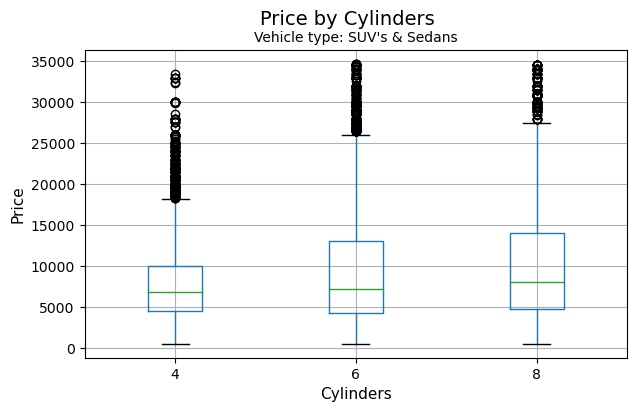

In [135]:
# Boxplot on the relationship between number of cylinders and price:
data = df_good.query("type == 'suv' or type == 'sedan'")

# Getting dataframe with sorted median values of each cylinders group
def boxplot_sorted(data, figure, by, column, rot=0):          

    data2 = pd.DataFrame({col:vals[column] for col, vals in data.groupby(by)})
    meds = data2.median().sort_values()
    return data2[meds.index].boxplot(rot=rot, return_type="axes")


figure=plt.figure(figsize=(7,4))
axes = boxplot_sorted(data, figure, by = ['cylinders'], column = 'price')
plt.xlabel('Cylinders', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.title(f"Vehicle type: SUV's & Sedans", fontsize=10)
plt.suptitle('Price by Cylinders', fontsize=14)
plt.show()

**Intermediate Conclusion**
<br>
Our number of cylinders show a relatively weak but notable positive correlation with price. This is realistic, as more cylinders = bigger engines = higher cost to manufacture.

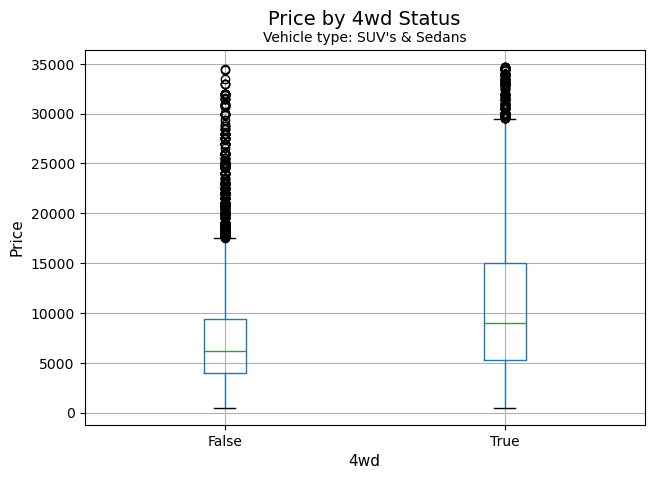

In [136]:
# Boxplot on the relationship between 4wd status and price:
data = df_good.query("type == 'suv' or type == 'sedan'")

data.boxplot('price', by='is_4wd', figsize=(7,5))

plt.xlabel('4wd', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.title(f"Vehicle type: SUV's & Sedans", fontsize=10)
plt.suptitle('Price by 4wd Status', fontsize=14)

plt.show()

**Intermediate Conclusion:**
<br>
This one is obvious. There is approximately a 30% jump from 2wd vehicles to 4wd vehicles. Vehicles with 4wd are inherently more expensive than their 2wd counterparts, due to cost of manufacturing. 4wd status is positive correlated with price.

# 11. <ins>General conclusion<ins>    

## Data Cleaning

1. Duplicates: There were none.
2. Missing Values: 
- Model Year column: had null values that appeared to be missing at random with no interdependence on other values. Because they represented 7% of our data, we replaced them with the means of their corresponding 'model' groups.
- Cylinders: null values were filled with the median values of their respective vehicle models
- Odometer null values appeared to be random, but seeing as this is an important column, we replaced them with the median odometer readings of respective model years
- Paint Color: null values were filled in with 'unknown' as the nature of this category is subjective to an individual's preference and entirely random.
- is_4wd: null values appeared to be just data pipeline error. Since this column is a boolean array, we filled them NaN with {0} and converted the entire column to the bool type.
3. Data Type Fixes:
- Odometer: was converted to the INT type
- Type: column values had different casings, so all were converted to the lower-string format
- Date Posted: column was converted to DataTime object
4. Features Engineering:
- Extracting datetime values for computation
- Creating a new column of car ages based on our datetime values at time of posting
- Creating a new column of mileage per year values
- Extracting brands from our vehicle models
- Classifying our condition string values into unique IDs
5. Outliers: Outliers were filtered out from 'price', 'cylinders', 'age', 'mileage' and 'condition' as these represent important columns to our analysis and were heavily skewing our data.



## Price Factors:

A few things to consider:
<br>
Our average vehicle age of our cars is around the 5-8 year mark. This is consistent with the fact that a vehicle's *BOOK VALUE* depreciates down to 0 (20% a year) after 5 years and is unable to be counted towards a company's expenses and hence any tax exemptions. With regards to the everyday customer, 5-8 years is also about the time major changes happen in life; for example a promotion, getting married or starting a family. 5-8 years seems like a good time to sell before any remaining *INTRINSIC VALUE* is completely diminished. We have to under that a vehicle's lifespan (age) is paramount to a their price, as it will always be considered a depreciating asset. That being said, these are our price factors to conclude.
<br>
1. **Primary Factor**: Vehicle age (lifespan) is our most important factor. Our correlation matrix depicted a realtively strong negative correlation between age and price, for the reasons stated above. There's no running away from it, the moment a vehicle has touched the road, depreciation would have already set in.
<br>
2. **Secondary Factors**: These are factors that come into play AFTER considering a vehicle's age.
- Transmission: The type of transmission and its increasing complexity/cost has a positive correlation with price. Manuals were the cheapest, followed by automatics and then others (which we would assume are rarer kinds of transmissions, ie. electric motors)
- Paint Color: Our highest observed colors with a sample size higher than {3000} appeared to be muted ones especially black and white, which would make them an in demand choice among our population. The higher the demand, the higher the price.
- Brand: This was obvious. Brands with market positionings of high performance (sports cars, pickup trucks) had a higher average price.
- Cylinders: This ties in with brand; the higher the amount of cylinders and hence the performance and cost of manufacturing, the higher the average price of the vehicle. 
- 4wd: This one was clear, whereby the 4wd variants of vehicles were pricier than its 2wd counterparts. This is due to a higher complexity drivetrain and thus, higher performance and cost of manufacturing.
3. **Null-Factors**: Mileage and condition, showed close to no correlation whatsoever. We obviously still think that it has some role to play in price determination, but it is very much on the backfoot when compared to our age factor.